In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv('../DATA/student-mat-cleaned.csv')


In [ ]:
X = df[['G1','G2', 'Dalc','absences', 'failures', 'internet']]
Y= df['G3']

In [14]:
# TRAIN TEST SPLITTING
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [15]:
# PERFORMING STANDARDIZATION

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: ylabel='G3'>

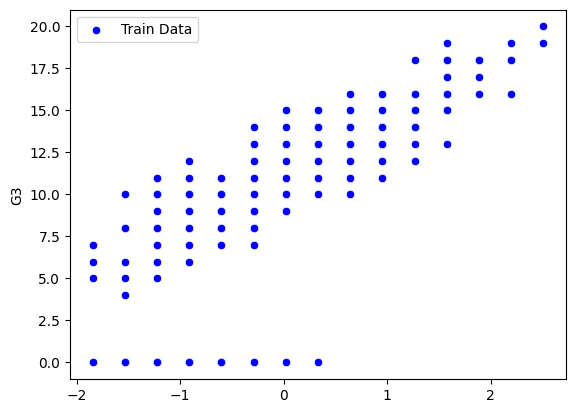

In [16]:
sns.scatterplot(x=X_train_scaled[:,0],y=Y_train, color='blue', label='Train Data')

In [ ]:
## APPLYING LASSO REGRESSION 

from sklearn.linear_model import LassoCV, Lasso

In [26]:
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000)
lasso_cv.fit(X_train_scaled, Y_train)

c:\Users\dyash\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1632: FutureWarning: 'alphas=None' is deprecated and will be removed in 1.9, at which point the default value will be set to 100. Set 'alphas=100' to silence this warning.
  warnings.warn(


,eps,0.001
,n_alphas,'deprecated'
,alphas,None
,fit_intercept,True
,precompute,'auto'
,max_iter,10000
,tol,0.0001
,copy_X,True
,cv,10
,verbose,False
,n_jobs,None


In [27]:
print(f"Best alpha: {lasso_cv.alpha_}")

Best alpha: 0.08360574946973001


In [29]:
lasso_model = Lasso(alpha=lasso_cv.alpha_)
lasso_model.fit(X_train_scaled, Y_train)

,alpha,np.float64(0....0574946973001)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [30]:
# Predictions
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

In [31]:
# Evaluation
print(f"R^2 Score on Training Data: {r2_score(Y_train, y_train_pred)}")
print(f"R^2 Score on Testing Data: {r2_score(Y_test, y_test_pred)}")



R^2 Score on Training Data: 0.8321315051640086
R^2 Score on Testing Data: 0.7839406238376685


In [32]:
features = pd.Series(lasso_model.coef_, index=X.columns)
print("Selected Features (Non-zero Coefficients):")
print(features[features != 0])

Selected Features (Non-zero Coefficients):
G1          0.421956
G2          3.637764
failures   -0.262401
dtype: float64
